# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [1]:
# Packages we need in analysis
import sqlite3 as sql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decimal import Decimal
from scipy import stats
from matplotlib import pylab

In [2]:
db = sql.connect("/Users/jeremyli/Desktop/STA141B/baseball.sqlite")
db

In [3]:
# First we join the team table and the salaries table within the time period
# Then we remove the duplicated players using DISTINCT
# Then calculate the sum of the salary of each team in each year
# Then we output the maximum, which the highest payrolls of each time regardless of the year
pd.read_sql("""

        SELECT name, teamID, MAX(payrolls) as payrolls, yearID FROM(
            SELECT * FROM (
                SELECT SUM(salary) AS payrolls, yearID, teamID, name FROM(
                    SELECT DISTINCT playerID, salary, yearID, T.teamID, name FROM
                        (SELECT * FROM salaries
                        WHERE yearID > 2005 AND yearID < 2017) as S
                        LEFT JOIN 
                        (SELECT name, teamID FROM teams
                        WHERE yearID > 2005 AND yearID < 2017) as T
                        ON S.teamid = T.teamid
                )    
                GROUP BY teamID, yearID ORDER BY payrolls DESC     
            )
        )
        GROUP BY teamID ORDER BY max(payrolls) DESC LIMIT 5
""", db)

,name,teamID,payrolls,yearID
0,New York Yankees,NYA,231978886,2013
1,Los Angeles Dodgers,LAN,223362196,2013
2,Detroit Tigers,DET,194876481,2016
3,Boston Red Sox,BOS,188545761,2016
4,Philadelphia Phillies,PHI,180944967,2014


### 1.1.1
From 2006 to 2016, the 5 teams with the highest payrolls regardless of the year, is New York Yankees, Los Angeles Dodgers, Detroit Tigers, Boston Red Sox and Philadelphia Phillies, with Yankees being the highest and Phillies being the lowest, in that order. 

Text(0.5, 1.0, 'Top 5 Baseball Teams Payrolls From 2006-2018')

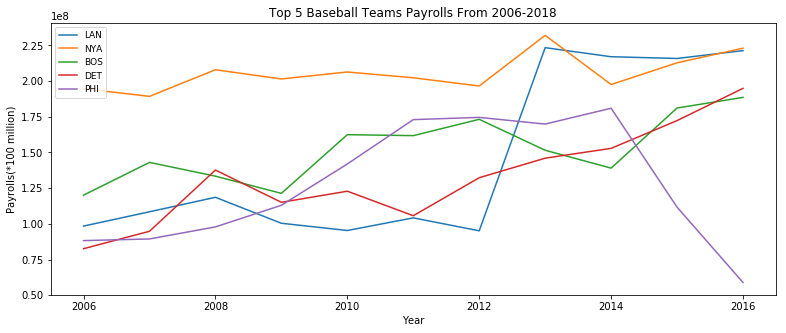

In [4]:
# First we join the team table and the salaries table within the time period
# Then we remove the duplicated players using DISTINCT
# Then calculate the sum of the salary of each team in each year and order them
trend_table = pd.read_sql("""
    
         SELECT * FROM (
                SELECT SUM(salary) AS payrolls, yearID, teamID, name FROM(
                    SELECT DISTINCT playerID, salary, yearID, T.teamID, name FROM
                        (SELECT * FROM salaries
                        WHERE yearID > 2005 AND yearID < 2017) as S
                        LEFT JOIN
                        (SELECT name, teamID FROM teams
                        WHERE yearID > 2005 AND yearID < 2017) as T
                        ON S.teamID = T.teamID
                )    
                GROUP BY teamID, yearID ORDER BY payrolls DESC     
            )
    
""", db)

# Subset the table to get the top 5 teams
trend_table = trend_table[(trend_table.teamID == "NYA") | (trend_table.teamID == "LAN") | (trend_table.teamID == "DET") |
            (trend_table.teamID == "BOS") | (trend_table.teamID == "PHI")]

# Plot the LOS ANGELES DODGERS teams in line plot
plt.figure(figsize=(13,5))
LAN_table = trend_table[(trend_table.teamID == "LAN")]
LAN_table = LAN_table.sort_values(by=["yearID"])
plt.plot(LAN_table.yearID,LAN_table.payrolls,label = 'LAN')

# Plot the NEW YORK YANKEES teams in line plot
NYA_table = trend_table[(trend_table.teamID == "NYA")]
NYA_table = NYA_table.sort_values(by=["yearID"])
plt.plot(NYA_table.yearID,NYA_table.payrolls,label = 'NYA')

# Plot the BOSTON RED SOX teams in line plot
BOS_table = trend_table[(trend_table.teamID == "BOS")]
BOS_table = BOS_table.sort_values(by=["yearID"])
plt.plot(BOS_table.yearID,BOS_table.payrolls,label = 'BOS')

# Plot the DETROIT TIGERS teams in line plot
DET_table = trend_table[(trend_table.teamID == "DET")]
DET_table = DET_table.sort_values(by=["yearID"])
plt.plot(DET_table.yearID,DET_table.payrolls,label = 'DET')

# Plot the PHILADELPHIA PHILLIES teams in line plot
PHI_table = trend_table[(trend_table.teamID == "PHI")]
PHI_table = PHI_table.sort_values(by=["yearID"])
plt.plot(PHI_table.yearID,PHI_table.payrolls,label = 'PHI')

# Adding labels to the plot
plt.legend(loc='upper left',prop={'size': 9})
plt.xlabel('Year')
plt.ylabel('Payrolls(*100 million)')
plt.title('Top 5 Baseball Teams Payrolls From 2006-2018')


In [7]:
PHI_table = trend_table[(trend_table.teamID == "PHI")]
PHI_table
PHI_table = PHI_table.sort_values(by=["yearID"])
PHI_table
#plt.plot(PHI_table.yearID,PHI_table.payrolls,label = 'PHI')

,payrolls,yearID,teamID,name
176,88273333,2006,PHI,Philadelphia Phillies
169,89428213,2007,PHI,Philadelphia Phillies
139,97879880,2008,PHI,Philadelphia Phillies
96,113004046,2009,PHI,Philadelphia Phillies
44,141928379,2010,PHI,Philadelphia Phillies
22,172976379,2011,PHI,Philadelphia Phillies
20,174538938,2012,PHI,Philadelphia Phillies
25,169863189,2013,PHI,Philadelphia Phillies
18,180944967,2014,PHI,Philadelphia Phillies
105,111693000,2015,PHI,Philadelphia Phillies


### 1.1.2
There are many changes in the general trend in payrolls over this time period. As we can see from the graph, NYA stays with the highest except for 2013-2015. DET and BOS with no big changes over the time period, but they show an increasing relationship in the payroll over the years. The two with the biggest chanegs are PHI and LAN, where LAN are being the lowest since 09-12 but then it suddenly increased and catched up to NYA in 2013 and later on. PHI had a large decrease in 2014 and is the lowest in 2016. 

### 1.1.3
The two anomalies in the payroll over this time period is the increasing of payroll in 2013 of LAN and the decreasing of payroll in 2014-2016 in PHI. The LAN had their lowest time in 2009-2012 when they were the lowest payroll among the 5 teams, LAN even were in bankruptcy court and owned by Frank McCourt, this is why LAN was being the lowest. Then in 2013, Guggenheim Baseball Group has gone on a massive spending spree, attempting to bring the LAN back on top, therefore, it casued the sudden increase on the plot where 2012-2013 LAN had their position on the top. For PHI,  the reason was after missing in the playoffs for three straight seasons in 2014, the office decided to rebuild the team where it took two steps, losing and lowering payrolls. Despite in the past, PHI was not one of those teams with low payroll, in order to rebuild the team, the office acknowledged that reducing the payroll will help building a core of players capable of contending and put the team on the free-agent front. Therefore, based on this decision, PHI experienced a significant decreasing in payroll in 2015 and 2016. 

Citation:

LAN: http://articles.latimes.com/2013/jan/15/sports/la-sp-dn-dodgers-payroll-20130115
                     
PHI: https://www.nbcsports.com/philadelphia/philadelphia-phillies/phillies-shrunken-payroll-byproduct-rebuild

In [21]:
# First join the team and salaries tables
# Then remove the top 5 teams from the table
# Then we remove the duplicated players using DISTINCT
# Then calculate the average of the salary of each team in each year and order them
OTHER_table = pd.read_sql("""
        SELECT AVG(payrolls) as payrolls , yearID FROM(
        SELECT SUM(salary) as payrolls ,teamID, yearID, name FROM (
        SELECT * FROM(
                    SELECT DISTINCT playerID, salary, yearID, T.teamID, name FROM
                        (SELECT * FROM salaries
                        WHERE yearID > 2005 AND yearID < 2017) as S
                        LEFT JOIN
                        (SELECT name, teamID FROM teams
                        WHERE yearID > 2005 AND yearID < 2017) as T
                        ON S.teamid = T.teamid
                )    
                WHERE teamID NOT IN ("NYA","LAN","BOS","DET",'PHI') 
        )
        GROUP BY teamID, yearID
        )
        GROUP BY yearID
""", db)


Text(0.5, 1.0, 'Top 5 Baseball Teams and Other Teams Payrolls From 2006-2018')

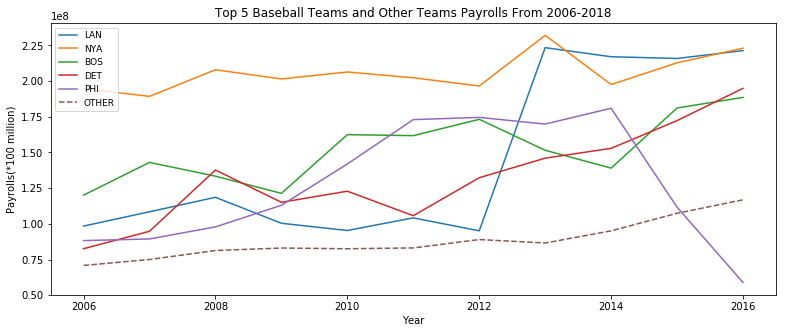

In [22]:
# Plot the LOS ANGELES DODGERS teams in line plot
plt.figure(figsize=(13,5))
LAN_table = trend_table[(trend_table.teamID == "LAN")]
LAN_table = LAN_table.sort_values(by=["yearID"])
plt.plot(LAN_table.yearID,LAN_table.payrolls,label = 'LAN')

# Plot the NEW YORK YANKEES teams in line plot
NYA_table = trend_table[(trend_table.teamID == "NYA")]
NYA_table = NYA_table.sort_values(by=["yearID"])
plt.plot(NYA_table.yearID,NYA_table.payrolls,label = 'NYA')

# Plot the BOSTON RED SOX teams in line plot
BOS_table = trend_table[(trend_table.teamID == "BOS")]
BOS_table = BOS_table.sort_values(by=["yearID"])
plt.plot(BOS_table.yearID,BOS_table.payrolls,label = 'BOS')

# Plot the DETROIT TIGERS teams in line plot
DET_table = trend_table[(trend_table.teamID == "DET")]
DET_table = DET_table.sort_values(by=["yearID"])
plt.plot(DET_table.yearID,DET_table.payrolls,label = 'DET')

# Plot the PHILADELPHIA PHILLIES teams in line plot
PHI_table = trend_table[(trend_table.teamID == "PHI")]
PHI_table = PHI_table.sort_values(by=["yearID"])
plt.plot(PHI_table.yearID,PHI_table.payrolls,label = 'PHI')

# Plot the none top 5 teams in line plot
plt.plot(OTHER_table.yearID,OTHER_table.payrolls,label = 'OTHER',linestyle='dashed')
plt.legend(loc='upper left',prop={'size': 9})
plt.xlabel('Year')
plt.ylabel('Payrolls(*100 million)')
plt.title('Top 5 Baseball Teams and Other Teams Payrolls From 2006-2018')

### 1.1.4
When comparing the top 5 teams with other teams, by calculating the average of payrolls of other all teams separatly by years, we can see that, from the plot above, the line is below the top 5 teams for every year from 2006-2016, which means that for most of the other teams, their payroll from 2006-2016 is below the top 5 teams. 

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

### 1.2.1
#### Question: What is the trend in salary of baseball from 2000-2016? 

Text(0.5, 1.0, 'Sum of Salary of Baseball Players from 2000 to 2016')

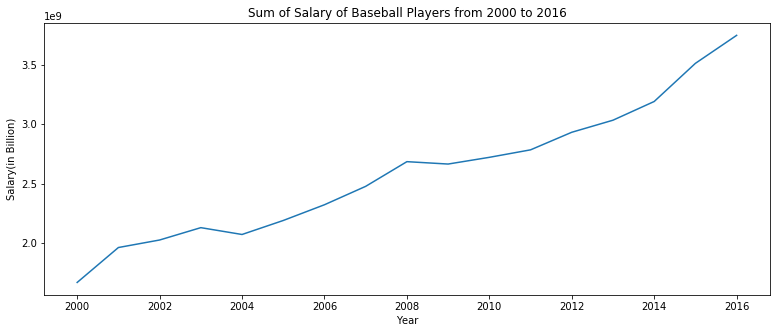

In [23]:
# Get the sum of salary within 2000-2016 of baseball players
sum_salary = pd.read_sql("SELECT SUM(salary) as salary, yearID FROM Salaries WHERE yearID > 1999 AND yearID < 2017 GROUP BY yearID;",db)
# Plot the sum
plt.figure(figsize=(13,5))
plt.plot(sum_salary.yearID,sum_salary.salary)
plt.xlabel('Year')
plt.ylabel('Salary(in Billion)')
plt.title('Sum of Salary of Baseball Players from 2000 to 2016')

Text(0.5, 1.0, 'Average of Salary of Baseball Players from 2000 to 2016')

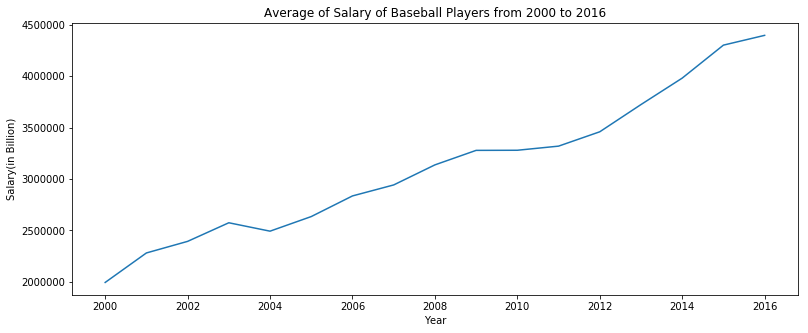

In [24]:
# Get the average of salary within 2000-2016 of baseball players
avg_salary = pd.read_sql("SELECT AVG(salary) as salary, yearID FROM Salaries WHERE yearID > 1999 AND yearID < 2017 GROUP BY yearID;",db)

# Display the plot
plt.figure(figsize=(13,5))
plt.plot(avg_salary.yearID,avg_salary.salary)
plt.xlabel('Year')
plt.ylabel('Salary(in Billion)')
plt.title('Average of Salary of Baseball Players from 2000 to 2016')

#### Answer: 
As shown in the plot above, the trend of average salary of baseball players is increasing over the time period from 2000 to 2016. What we can conclude from this result is that, firstly, as the minimum wage raises every year, it is reasonable that the salary of baseball player also raises, therefore we see that the trend of average salary of baseball players is increasing over the time period. Secondly, as baseball is becoming more popular, people are more willing to watch baseball games, this also causes the raise of average salary of baseball players. 

When we look at the sum of salary of baseball players in the league, we notice that there is an increasing trend as well. First, as the average of salary of baseball players increases, it is normal to see the sum of salary increases as well. Secondly, we can say that people value the sport of baseball more and more over the years, the sport of baseball is becoming more popular and people are willing to pay to watch baseball, therefore it raises the overall salary of baseball players. Thirdly, when we see an increasing trend in sum of salary of baseball players, we can also conclude that the sponsors of baseball teams are more willing to invest their money into the baseball teams. 

### 1.2.2 
#### Question: Is there a difference in salary between players with award and players with no award?

,Players,salary
0,Players with Awards,9.740548e+06
1,Players with no Awards,2.476121e+06


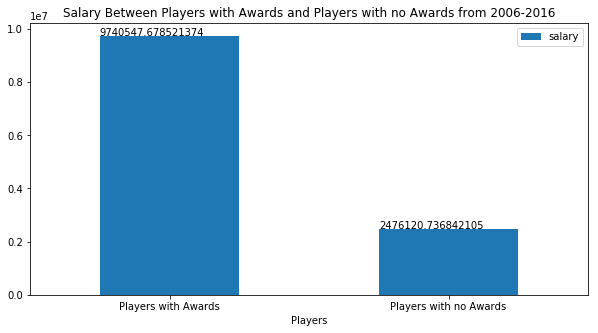

In [5]:
# First we join the salaries and awards table within 2006-2016
# Then we get the average salary of players with awards
# Then we again join the salaries and awards table within 2006-2016
# This time we get the average salary of players with no award
# Then we join the salary of players with award and no award together
award_vs_normal = pd.read_sql("""
                    SELECT * FROM(
                    (SELECT AVG(salary) as award_avg FROM(
                        (SELECT teamID, playerID, salary FROM salaries
                        WHERE yearID > 2005 AND yearID < 2017) as S
                        LEFT JOIN
                        (SELECT playerID as playerID2 FROM AwardsPlayers
                        WHERE yearID > 2005 AND yearID < 2017) as A
                        ON S.playerID = A.playerID2
                )  
                    WHERE playerID == playerID2)
                LEFT JOIN
                    (SELECT AVG(salary) as normal_avg FROM(
                        (SELECT teamID, playerID, salary FROM salaries
                        WHERE yearID > 2005 AND yearID < 2017) as S
                        LEFT JOIN
                        (SELECT playerID as playerID2 FROM AwardsPlayers
                        WHERE yearID > 2005 AND yearID < 2017) as A
                        ON S.playerID = A.playerID2
                )  
                    WHERE playerID2 is not playerID))
            
    
""", db)

# Display in bar plot
df = pd.DataFrame({'Players':['Players with Awards', 'Players with no Awards'], 'salary':[np.float64(award_vs_normal.award_avg), np.float64(award_vs_normal.normal_avg)]})
ax = df.plot.bar(x='Players', y='salary', rot=0,figsize=(10,5),title='Salary Between Players with Awards and Players with no Awards from 2006-2016')
for p in ax.patches:
    ax.annotate('{}'.format(Decimal(str(p.get_height()))), (p.get_x(), p.get_height()))
df

#### Answer:
As the question stated, we are looking to find the difference in salary between players who won at least one award and players with no award at all. My assumption is that players with at least one awards are definitely getting paid higher than players with no award. As shown in the plot above, there is a significant different between the salary of two types pf players. Players who won at least one award are in average getting paid about 9740547 dollars, while players with no award are getting paid much lower, approximately 2476120 dollars. Players with at least one award are getting paid four times as much as players with no award. 

Therefore, it proves that our assumption is true. The reason that this is true because when determining the salary that a professional athlete worth, the management often look at their statistics playing in the game, as well as their popularity, which these can be determined in winning an award. Winning an award can be from a skill challenge context, or from achieving something such as breaking a historical record. Therefore, winning an award means their statistics is decent and their popularity is high, which these will lead them to be paid much higher. 


### 1.2.3
#### Question Is there a relationship between win rate and the payroll of baseball teams? 

In [26]:
# First we join the teams and salaries table together within 2012-2016
# Then we calculate the winning rate and show the payroll for each team and each year
winrate_vs_payroll = pd.read_sql("""
    SELECT yearID, win_rate, payrolls FROM (
        (SELECT yearID,teamID, (W+0.0)/(G+0.0) as win_rate FROM Teams 
        WHERE yearID > 2011 AND yearID < 2017) as W
        LEFT JOIN
        (SELECT SUM(salary) as payrolls, teamID, yearID as yearID2 FROM salaries 
        WHERE yearID > 2011 AND yearID < 2017 GROUP BY yearID, teamID ) as S
        ON W.yearID = S.yearID2 AND W.teamID == S.teamID
    )
""", db)

# Subsetting by year into new dataframe
w2012 = winrate_vs_payroll[winrate_vs_payroll.yearID == 2012]
w2013 = winrate_vs_payroll[winrate_vs_payroll.yearID == 2013]
w2014 = winrate_vs_payroll[winrate_vs_payroll.yearID == 2014]
w2015 = winrate_vs_payroll[winrate_vs_payroll.yearID == 2015]
w2016 = winrate_vs_payroll[winrate_vs_payroll.yearID == 2016]

Text(0, 0.5, 'Payrolls(*100 million)')

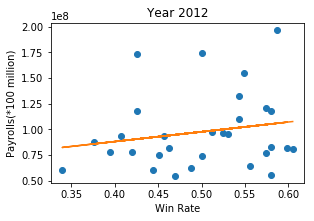

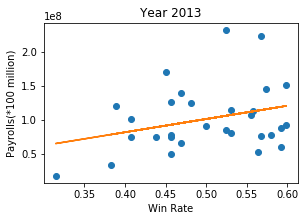

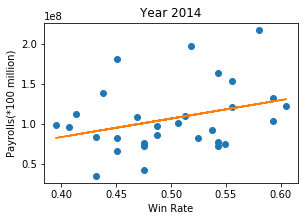

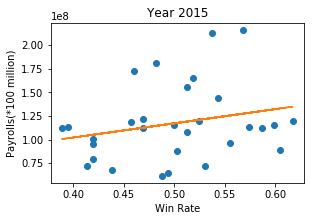

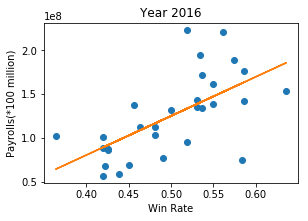

In [27]:
# Display in scatter plot with regression line of year 2012
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(w2012.win_rate,w2012.payrolls)
line = slope*w2012.win_rate+intercept
plt.plot(w2012.win_rate,w2012.payrolls,'o', w2012.win_rate, line)
pylab.title('Year 2012')
pylab.xlabel('Win Rate')
pylab.ylabel('Payrolls(*100 million)')

# Display in scatter plot with regression line of year 2013
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 2)
slope, intercept, r_value, p_value, std_err = stats.linregress(w2013.win_rate,w2013.payrolls)
line = slope*w2013.win_rate+intercept
plt.plot(w2013.win_rate,w2013.payrolls,'o', w2013.win_rate, line)
pylab.title('Year 2013')
pylab.xlabel('Win Rate')
pylab.ylabel('Payrolls(*100 million)')

# Display in scatter plot with regression line of year 2014
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 3)
slope, intercept, r_value, p_value, std_err = stats.linregress(w2014.win_rate,w2014.payrolls)
line = slope*w2014.win_rate+intercept
plt.plot(w2014.win_rate,w2014.payrolls,'o', w2014.win_rate, line)
pylab.title('Year 2014')
pylab.xlabel('Win Rate')
pylab.ylabel('Payrolls(*100 million)')

# Display in scatter plot with regression line of year 2015
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 4)
slope, intercept, r_value, p_value, std_err = stats.linregress(w2015.win_rate,w2015.payrolls)
line = slope*w2015.win_rate+intercept
plt.plot(w2015.win_rate,w2015.payrolls,'o', w2015.win_rate, line)
pylab.title('Year 2015')
pylab.xlabel('Win Rate')
pylab.ylabel('Payrolls(*100 million)')

# Display in scatter plot with regression line of year 2016
plt.figure(figsize=(10,10))
plt.subplot(3, 2, 5)
slope, intercept, r_value, p_value, std_err = stats.linregress(w2016.win_rate,w2016.payrolls)
line = slope*w2016.win_rate+intercept
plt.plot(w2016.win_rate,w2016.payrolls,'o', w2016.win_rate, line)
pylab.title('Year 2016')
pylab.xlabel('Win Rate')
pylab.ylabel('Payrolls(*100 million)')


#### Answer:
For this question, we are looking to find out that whether there is a relationship between the winning rate of baseball teams and their payrolls. My assumption for this is that there is a positive relationship between the winning rate of baseball teams and their payrolls. As the plots shows above, we can see that from the year 2012 to 2016, despite there are different winning rates from the baseball teams, as the winning rate goes up, the payroll also goes up, which means there is a positive relationship between the winning rate and the payrolls. 

Therefore, we can conclude that as the team having more money for their payroll, their winning rate will go up, because those money can be used to train the players, buy and trade players with better skills and do much more to improve the team. Having good players on the team will definitely help the team winning the game. Hence, our assumption is proved that as the team having higher payroll, its chance of winning will be higher as well. 
